In [1]:
# !pip install plotly


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
# Reading data in the system
reviews_df = pd.read_csv('amazon_vfl_reviews.csv')
reviews_df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...


In [4]:
reviews_df.shape

(2782, 5)

In [5]:
# any null columns
reviews_df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

In [6]:
# the review column, four rows without review text, we drop the rows with the null columns
reviews_df = reviews_df.dropna()
#resetting the index
reviews_df = reviews_df.reset_index(drop=True)
# any null columns
reviews_df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

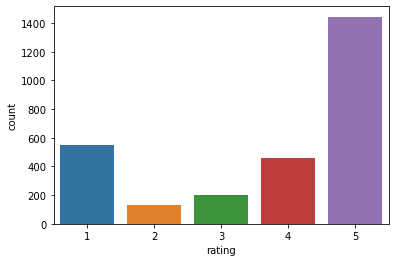

In [7]:
import seaborn as sns
sns.countplot(x='rating',data=reviews_df)

In [8]:
import re
# remove all characters not number or characters
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0-9]+', ' ', input_string)
    return(modified_string)
reviews_df['review'] = reviews_df.review.apply(cleanText)
reviews_df['review'][150]

'I am writing this review after using it around 20 days It seems very natural and chemical free and is very gentle on skin But it does its job of cleaning the skin properly It contains tea tree which is one of my favourite ingredients for skin care Give it a try its definitely better than all other chemicals containing face washes And its even affordable as compared to other natural brands available in market '

In [9]:
# From the name we extract the brand
reviews_df['brandName'] = reviews_df['name'].str.split('-').str[0]
reviews_df.head()

,asin,name,date,rating,review,brandName
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth


In [10]:
reviews_df['brandName'].value_counts()

Cinthol        200
Mamaearth      200
Titan          200
Himalaya       200
Godrej         200
Streax         188
Society        182
Tata           180
Dettol         180
Amul           164
Fastrack       160
Mysore         154
Patanjali      152
Britannia      120
Reflex          40
Natural         40
MYSORE          40
Paper           40
Coca            20
Glucon          20
Maaza           20
PATANJALI       20
Maggi           20
Savlon          20
NutriChoice     12
Indiana          6
Name: brandName, dtype: int64

In [11]:
reviews_df['brandName'] = reviews_df['brandName'].str.title()
reviews_df.brandName.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'Nutrichoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [12]:
df1 = pd.DataFrame(reviews_df.groupby('brandName')['asin'].count().reset_index())
df1.columns=['brandName','count']
sort_df = df1.sort_values(['count'],ascending=True)

fig = px.bar(sort_df.iloc[:5,:],y='brandName',x='count',
             orientation='h',color='count')
fig.update_layout(title_text='Top 5 Names Of Brands With Least Number Of Reviews',title_x=0.5,
                  template='plotly_dark')
fig.show()

In [13]:
# Extracting the product from the name column.
products = []
for value in reviews_df['name']:
    indx = len(value.split('-')[0])+1
    products.append(value[indx:])
reviews_df['product'] = products
reviews_df['product'].unique()

array(['Onion-Growth-Control-Redensyl',
       'Percent-Natural-Berry-Toothpaste',
       'Natural-Turmeric-Saffron-brightning',
       'Illuminate-Vitamin-Radiant-Turmeric',
       'Blemishes-Pigmentation-Blemish-Mulberry', 'Face-Wash-100-ml',
       'Moisturizing-Baby-Bathing-Oatmeal',
       'Protekt-Master-Blaster-Handwash', 'No-1-Bathing-Soap-Lime',
       'No-1-Bathing-Soap-Turmeric', 'Direct-Cool-Refrigerator-1905-PTDI',
       'aer-Pocket-Bathroom-Fragrance',
       'Security-Solutions-SEEC9060-Electronic',
       'Matic-Spray-Violet-Valley',
       'Security-Solutions-Goldilocks-Personal',
       'ViroShield-Disinfecting-VIROSHIELD-30UV',
       'Analog-Black-Dial-Watch-1805NM01',
       'Analog-White-Dial-Watch-NK1639SL03',
       'Karishma-Analog-Blue-Watch-1774SM01',
       'Karishma-Analog-Black-Watch-NK1639SM02',
       'Octane-Analog-Silver-Watch-NK1650BM03',
       'Analog-Black-Dial-Watch-NK1730SL02',
       'Karishma-Analog-Champagne-Watch-NK1580YL05',
       'Analog-

In [14]:
reviews_df.head()

,asin,name,date,rating,review,brandName,product
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl


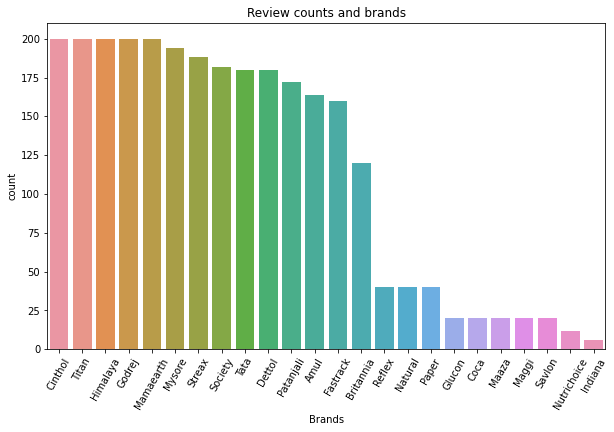

In [15]:
plt.figure(figsize = (10,6))
sns.barplot(reviews_df['brandName'].value_counts()[:25].index,reviews_df['brandName'].value_counts()[:25].values)
plt.title('Review counts and brands')
plt.xlabel('Brands')
plt.ylabel('count')
plt.xticks(rotation=60)
plt.show()

Text analysis with NLTK and Vader Sentiment analyzer

In [16]:
import string
import nltk
from nltk.corpus import stopwords
#converting to lower case
reviews_df['clean_review_text']=reviews_df['review'].str.lower()
#removing punctuations
reviews_df['clean_review_text']=reviews_df['clean_review_text'].str.translate(str.maketrans('', '',string.punctuation))
stopWords=stopwords.words('english')+['the', 'a','an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
reviews_df['clean_review_text'] = [removeStopWords(stopWords,x) for x in reviews_df['clean_review_text']]

**Stemming**

In [17]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)
reviews_df['clean_review_text']=reviews_df['clean_review_text'].apply(stem_sentences)
#data_stem['TWEET_SENT_1'] = data_stem['TWEET_SENT_1'].apply(stem_sentences)

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
reviews_df.head()

,asin,name,date,rating,review,brandName,product,clean_review_text
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl,bought hair oil view mani good comment product...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl,use mama earth newli launch onion oil twice mu...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl,bad product hair fall increas much order shamp...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl,product smell similar navarathna hair oil stro...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl,tri differ onion oil hair hair healthi product...


In [20]:
from nltk.tokenize import word_tokenize
#splitting text into words
tokenList=[]
for indx in range(len(reviews_df)):
       token=word_tokenize(reviews_df['clean_review_text'][indx])
       tokenList.append(token)
reviews_df['review_tokens'] = tokenList
reviews_df.head()

,asin,name,date,rating,review,brandName,product,clean_review_text,review_tokens
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl,bought hair oil view mani good comment product...,"[bought, hair, oil, view, mani, good, comment,..."
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl,use mama earth newli launch onion oil twice mu...,"[use, mama, earth, newli, launch, onion, oil, ..."
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl,bad product hair fall increas much order shamp...,"[bad, product, hair, fall, increas, much, orde..."
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl,product smell similar navarathna hair oil stro...,"[product, smell, similar, navarathna, hair, oi..."
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl,tri differ onion oil hair hair healthi product...,"[tri, differ, onion, oil, hair, hair, healthi,..."


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in reviews_df['clean_review_text']:
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.05 : 
            sentiment_score_flag.append('positive')
  
        elif sentimentResults['compound'] <= - 0.05 : 
            sentiment_score_flag.append('negative')
  
        else : 
            sentiment_score_flag.append('neutral')
            
reviews_df['scores']=sentiment_scores
reviews_df['scoreStatus'] = sentiment_score_flag

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
reviews_df.head()

,asin,name,date,rating,review,brandName,product,clean_review_text,review_tokens,scores,scoreStatus
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/6/2019,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl,bought hair oil view mani good comment product...,"[bought, hair, oil, view, mani, good, comment,...",0.6124,positive
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/14/2019,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl,use mama earth newli launch onion oil twice mu...,"[use, mama, earth, newli, launch, onion, oil, ...",0.8176,positive
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,10/19/2019,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl,bad product hair fall increas much order shamp...,"[bad, product, hair, fall, increas, much, orde...",-0.6908,negative
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,9/16/2019,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl,product smell similar navarathna hair oil stro...,"[product, smell, similar, navarathna, hair, oi...",-0.1531,negative
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,8/18/2019,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl,tri differ onion oil hair hair healthi product...,"[tri, differ, onion, oil, hair, hair, healthi,...",0.6486,positive


In [95]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=reviews_df['scoreStatus'].value_counts().index.tolist(),
                             values=reviews_df['scoreStatus'].value_counts().tolist(),
                            marker=dict(colors=['Green','Red','Blue']))])

# fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
#                   template='plotly_dark')

fig.update_layout(title_text='Proportion of Sentiments', title_x=0.5,
                  template='plotly_white')
fig.show()


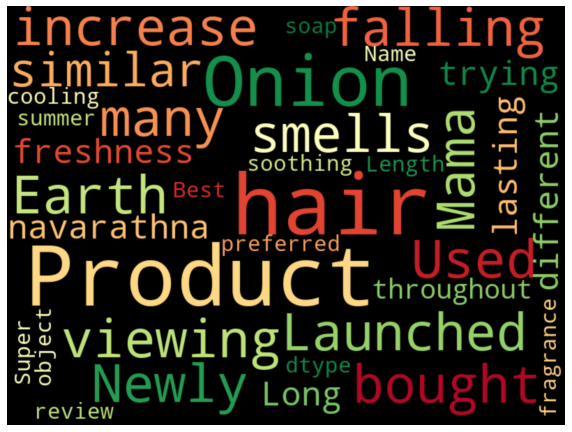

In [24]:
from wordcloud import WordCloud , ImageColorGenerator
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black'
    ).generate(str(data))

    plt.figure(figsize = (10, 10))
    plt.axis('off')

    plt.imshow(wordcloud,interpolation = 'gaussian')
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

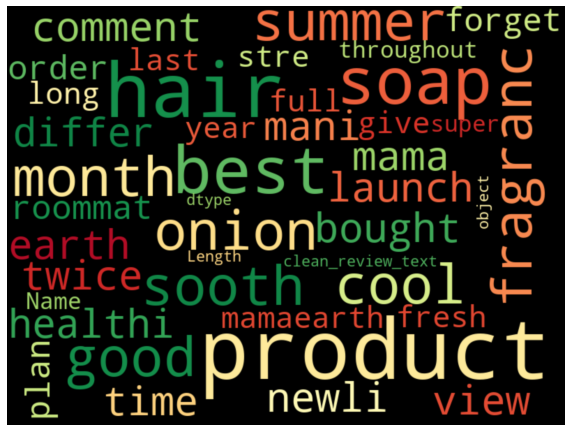

In [25]:
# print wordcloud
positiveReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "positive"]
show_wordcloud(positiveReviews_df["clean_review_text"])

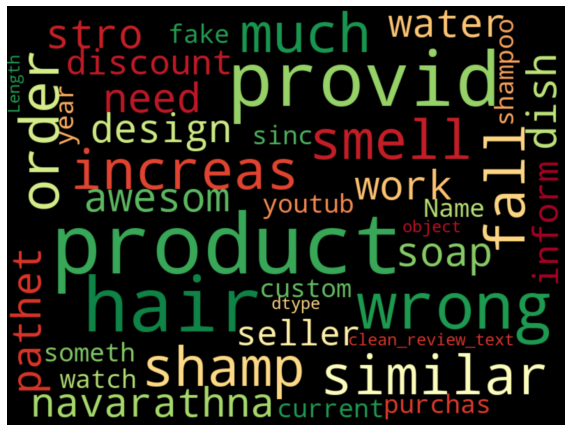

In [26]:
negativeReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "negative"]
## print wordcloud
show_wordcloud(negativeReviews_df["clean_review_text"])

In [27]:
a = pd.DataFrame(positiveReviews_df.groupby(['brandName']).count()["clean_review_text"])
positiveReviews_df.loc[positiveReviews_df['brandName'] == "Indiana"]["review"]
b = pd.DataFrame(negativeReviews_df.groupby(['brandName']).count()["clean_review_text"])
c = pd.concat([a, b], axis=1)
c.columns = ['positiveReviews','negativeReviews']
c

,positiveReviews,negativeReviews
Amul,130,12.0
Britannia,88,18.0
Cinthol,168,16.0
Coca,18,2.0
Dettol,132,20.0
Fastrack,126,18.0
Glucon,12,NaN
Godrej,154,38.0
Himalaya,154,38.0
Indiana,4,NaN


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
features = CountVectorizer()
features.fit(reviews_df["clean_review_text"])
print(len(features.vocabulary_))
print(features.vocabulary_)

3550
{'bought': 515, 'hair': 1468, 'oil': 2198, 'view': 3385, 'mani': 1928, 'good': 1404, 'comment': 747, 'product': 2462, 'enough': 1114, 'first': 1256, 'expens': 1165, 'second': 2750, 'thing': 3165, 'amount': 284, 'low': 1885, 'half': 1476, 'bottl': 512, 'ye': 3529, 'complet': 764, 'fill': 1244, 'cheat': 662, 'custom': 862, 'mamaearth': 1924, 'trust': 3270, 'fool': 1289, 'peopl': 2324, 'know': 1755, 'brand': 525, 'go': 1394, 'buy': 583, 'thumb': 3189, 'onion': 2214, 'use': 3339, 'mama': 1923, 'earth': 1070, 'newli': 2125, 'launch': 1784, 'twice': 3281, 'must': 2095, 'say': 2724, 'im': 1601, 'alreadi': 265, 'impress': 1610, 'result': 2651, 'prevent': 2438, 'loss': 1873, 'help': 1522, 'control': 798, 'prematur': 2428, 'grey': 1439, 'dryness': 1050, 'dandruff': 882, 'scalp': 2727, 'erupt': 1128, 'problem': 2457, 'regular': 2606, 'avoid': 371, 'dri': 1045, 'frizzi': 1336, 'make': 1914, 'sure': 3063, 'week': 3444, 'provid': 2493, 'essenti': 1134, 'nutrient': 2170, 'also': 266, 'strengthen

In [29]:
bagofWords = features.transform(reviews_df["clean_review_text"])
print(bagofWords)

  (0, 284)	1
  (0, 512)	2
  (0, 515)	1
  (0, 525)	2
  (0, 583)	1
  (0, 662)	1
  (0, 747)	1
  (0, 764)	1
  (0, 862)	1
  (0, 1114)	2
  (0, 1165)	1
  (0, 1244)	1
  (0, 1256)	1
  (0, 1289)	1
  (0, 1394)	1
  (0, 1404)	3
  (0, 1468)	1
  (0, 1476)	1
  (0, 1755)	1
  (0, 1885)	1
  (0, 1924)	2
  (0, 1928)	1
  (0, 2198)	3
  (0, 2214)	1
  (0, 2324)	1
  :	:
  (2772, 1211)	1
  (2773, 891)	1
  (2773, 1327)	1
  (2773, 1777)	1
  (2773, 1860)	1
  (2773, 3182)	1
  (2774, 2427)	1
  (2774, 2891)	1
  (2776, 2462)	1
  (2776, 3050)	1
  (2777, 447)	1
  (2777, 804)	1
  (2777, 924)	1
  (2777, 1045)	1
  (2777, 1312)	1
  (2777, 1565)	2
  (2777, 1579)	1
  (2777, 1595)	1
  (2777, 1801)	1
  (2777, 2058)	2
  (2777, 2609)	1
  (2777, 2861)	1
  (2777, 2891)	1
  (2777, 2920)	1
  (2777, 3044)	2


In [30]:
print(bagofWords.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(features.get_feature_names())

['00', '01', '02', '03', '06', '07', '08', '09', '10', '100', '1000', '100grm', '100ml', '1020r', '1025r', '109', '10calori', '10day', '10ltr', '10thick', '11', '110', '119', '12', '120', '120r', '1234', '125', '1256', '125g', '127r', '13', '130', '1300', '14', '140', '140r', '1499', '15', '1500', '1500ml', '150gm', '151', '153', '15th', '16', '160', '165', '165r', '168', '16k', '170', '171310', '173', '175r', '18', '182', '185', '188r', '18best', '18exp', '18i', '18made', '19', '190', '195', '199', '1995', '1kg', '1month', '1st', '1time', '1whole', '1yr', '20', '200', '20000', '200g', '200it', '200ml', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '21', '210', '216', '21600', '22', '220', '23', '230', '2395', '23march', '24', '24x7', '25', '250', '2500r', '26juli', '27', '28', '29th', '2k', '2month', '2nd', '2pc', '2week', '2year', '30', '300', '3000', '30day', '30ml', '31', '310', '315', '320', '325', '347', '355', '365', '385', '3daz', '3rd', '400', '400ml', '40min', '4200

In [32]:
from sklearn.model_selection import train_test_split
df = pd.concat([positiveReviews_df,negativeReviews_df])
df = df[["clean_review_text","scoreStatus"]]
df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1
X = df["clean_review_text"]
y = df["scoreStatus"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)
X= features.fit_transform(X)

In [33]:
X_train = features.fit_transform(X_train)
X_test = features.transform(X_test)

In [34]:
X_train

<1695x3311 sparse matrix of type '<class 'numpy.int64'>'
	with 33108 stored elements in Compressed Sparse Row format>

In [35]:
X_test

<727x3311 sparse matrix of type '<class 'numpy.int64'>'
	with 15336 stored elements in Compressed Sparse Row format>

In [36]:
X_train.shape

(1695, 3311)

In [37]:
X.shape

(2422, 3433)

In [38]:
X.shape

(2422, 3433)

In [39]:
y_train.shape

(1695,)

In [40]:
X_test.shape

(727, 3311)

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train) #ACC Witg LR is 98% 0:-.94,1:-.99

LogisticRegression()

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
Folds = KFold(n_splits=10)
result = cross_val_score(model,X,y,cv=Folds)
print("These are the results \n",result)

These are the results 
 [0.90123457 0.95061728 0.94214876 0.95867769 0.95041322 0.90909091
 0.95867769 0.95041322 0.70247934 0.02479339]


In [43]:
#from sklearn.metrics import confusion_matrix , classification_report
#print(classification_report(y_test,y_predicted))

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 71,  15],
       [  6, 635]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        86
           1       0.98      0.99      0.98       641

    accuracy                           0.97       727
   macro avg       0.95      0.91      0.93       727
weighted avg       0.97      0.97      0.97       727



Text(69.0, 0.5, 'Truth')

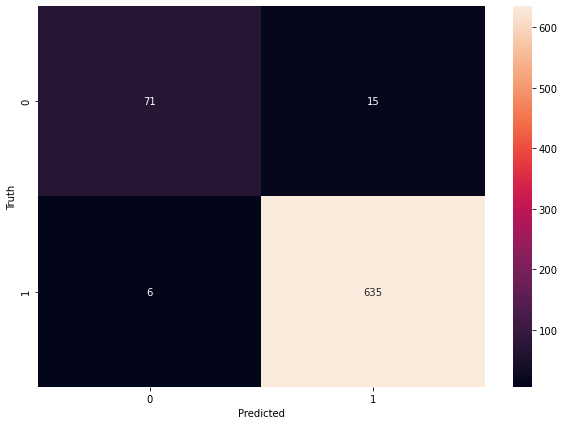

In [46]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**SVM**

In [47]:
from sklearn import svm
model2 = svm.SVC(kernel='linear')
model2.fit(X_train, y_train)  # ACC Witg SVM is 98% 0:-.94,1:-.99


SVC(kernel='linear')

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model2.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[ 76,  10],
       [  8, 633]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        86
           1       0.98      0.99      0.99       641

    accuracy                           0.98       727
   macro avg       0.94      0.94      0.94       727
weighted avg       0.98      0.98      0.98       727



**DecisionTree**

In [50]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train) #ACC Witg DT is 98% 0:-.95,1:-.99


DecisionTreeClassifier()

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model2.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[ 76,  10],
       [  8, 633]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        86
           1       0.98      0.99      0.99       641

    accuracy                           0.98       727
   macro avg       0.94      0.94      0.94       727
weighted avg       0.98      0.98      0.98       727



In [53]:
text = "the product great"
model.predict(features.transform([text]))[0]

1

In [54]:
text = "bad"
model.predict(features.transform([text]))[0]

0

In [55]:
text = "sucks"
model.predict(features.transform([text]))[0]

1

In [56]:
text = "very bad"
model.predict(features.transform([text]))[0]

0

In [57]:
text = "not good"
model.predict(features.transform([text]))[0]

1

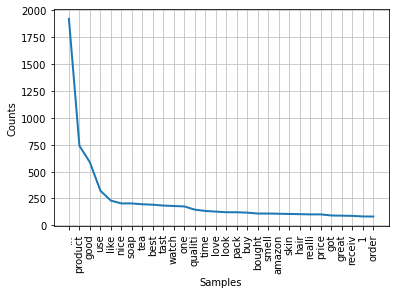

In [102]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
tokenized_word=word_tokenize((reviews_df['clean_review_text'].to_string()))
#Frequency Distribution
fdist = FreqDist(tokenized_word)
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

Text Analytics with spacy

In [59]:
#nlp=spacy.load("en_core_web_sm")

In [60]:
#text = reviews_df['review'][1130]
#doc=nlp(text)
#type(doc)
#print(doc)

In [61]:
#Tokens
#for token in doc:
    #print(token.text)

In [62]:
#Stopwords
#stopwords=spacy.lang.en.stop_words.STOP_WORDS
#stopWords = list(stopwords)
#len(stopWords)

In [63]:
#for token in doc:
    #if token.is_stop == False:
        #print(token)

In [64]:
#print(len(doc))
#doc2=[]
#for token in doc:
    #if not token.is_stop:
       #doc2.append(token)
#print(len(doc2))

In [65]:
#lemmatization
#for review_text in doc:
    #print(review_text.text,review_text.lemma_)

In [66]:
#POS
#for token in doc:
   #print(token,token.tag_,token.pos_,spacy.explain(token.tag_))

In [67]:
#displacy.render(doc,style='dep',jupyter=True,options={'distance':90})

In [68]:
#for entity in doc.ents:
   #print(entity.text,'---->',entity.label_)
#displacy.render(doc,style='ent',jupyter=True)

In [69]:
#word vectors and similarity
#large pre trained model
#!python -m spacy download en_core_web_lg

In [70]:
#import en_core_web_lg
#nlp = en_core_web_lg.load()
#doc=nlp(text)
#for token in doc:
   #print(token.text,'---->',token.has_vector)

In [71]:
#for token in doc:
    #print(token.text,'',token.vector_norm)

In [72]:
#similarity score
#text="eat"
#text1="ate"
#doc=nlp(text)
#doc1=nlp(text1)
#doc.similarity(doc1)

In [73]:
#similarity score
#text="good"
#text1="bad"
#doc=nlp(text)
#doc1=nlp(text1)
#doc.similarity(doc1)

In [74]:
#similarity score
#text="hot"
#text1="summer"
#doc=nlp(text)
#doc1=nlp(text1)
#doc.similarity(doc1)

In [75]:
#similarity score
#text="excellent"
#text1="good"
#doc=nlp(text)
#doc1=nlp(text1)
#doc.similarity(doc1)

In [76]:
#similarity score
#text="sucks"
#text1="bad"
#doc=nlp(text)
#doc1=nlp(text1)
#doc.similarity(doc1)

In [77]:
#df = pd.concat([positiveReviews_df,negativeReviews_df])
#df = df[["clean_review_text","scoreStatus"]]
#df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1

In [78]:
#Tokenization
#punct = string.punctuation
#print(punct)
#def cleanText(sent):
    #doc = nlp(sent)
    #tokens = []
    #for token in doc:
       #if token.lemma != "-PRON-":
            #tokens.append(token.lemma_.lower().strip())
        #else:
            #tokens.append(token.lemma_)
            
    #cleanTokens = []
    #for token in tokens:
        #if token not in stopWords and token not in punct:
            #cleanTokens.append(token)
    #return cleanTokens

In [79]:
#TFIDF
#tfidf = TfidfVectorizer(tokenizer = cleanText)
#classifier = LinearSVC()
#X = df["clean_review_text"]
#y = df["scoreStatus"]
#X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [80]:
#X_train.shape, X_test.shape

In [81]:
#clf = Pipeline([('tfidf',tfidf),('clf',classifier)])
#clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)

In [82]:
#print(classification_report(y_test,y_pred))

In [83]:
#confusion_matrix(y_test,y_pred)

With TextBlob

In [84]:
#nltk.download('averaged_perceptron_tagger')
#blob = TextBlob(str(reviews_df['review']))
#pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
#pos_df = pos_df.pos.value_counts()[:20]
#pos_df.iplot(
    #kind='bar',
    #xTitle='POS',
    #yTitle='count', 
    #title='Top 20 Part-of-speech tagging for review corpus')


In [85]:
#pol = lambda x: TextBlob(x).sentiment.polarity
#sub = lambda x: TextBlob(x).sentiment.subjectivity
#reviews_df["polarity"] = reviews_df["review"].apply(pol)
#reviews_df["subjectivity"] = reviews_df["review"].apply(sub)

In [86]:
#distribution of rating
#sns.countplot(x='rating', data=reviews_df)

In [87]:
#reviews_df.head()

In [88]:
#print("negative reviews")
#most_negative = reviews_df[reviews_df.polarity == -1].review.head()
#print(most_negative)
#print("positive reviews")
#most_positive = reviews_df[reviews_df.polarity == 1].review.head()
#print(most_positive)

Text analysis with gensim and word2vec

In [89]:
#pip install -U gensim

In [90]:
import gensim
from gensim.models import Word2Vec

In [91]:
sentences = reviews_df['review_tokens'][10:20]
sentences

10    [bought, hair, oil, view, mani, good, comment,...
11    [use, mama, earth, newli, launch, onion, oil, ...
12    [bad, product, hair, fall, increas, much, orde...
13    [product, smell, similar, navarathna, hair, oi...
14    [tri, differ, onion, oil, hair, hair, healthi,...
15    [use, product, time, roommat, plan, order, use...
16    [purchas, oil, shampoo, watch, fake, youtub, c...
17    [good, product, mamaearth, oil, give, hair, fu...
18    [show, onion, oil, benefit, ad, ate, give, oni...
19    [use, one, time, say, hairfal, control, stop, ...
Name: review_tokens, dtype: object

In [92]:
#train model
model = Word2Vec(sentences, min_count=1)
print(model)

#vocab
words = list(model.wv.index_to_key)
print(words)

#nltk.download('punkt')
reviewsText = reviews_df.clean_review_text.values
reviewsVec = [nltk.word_tokenize(review) for review in reviewsText]
len(reviewsVec)

Word2Vec(vocab=231, vector_size=100, alpha=0.025)
['hair', 'oil', 'product', 'use', 'onion', 'good', 'hairfal', 'scalp', 'fall', 'time', 'mamaearth', '2', 'result', 'pretti', 'sure', 'shampoo', 'increas', 'give', 'review', 'smell', 'well', 'help', 'control', 'visibl', 'dens', 'hairloss', 'youtub', 'dandruff', 'watch', 'shine', 'month', 'money', 'recommend', 'one', '1', 'provid', 'night', 'root', 'best', 'better', 'strong', '4', 'order', 'look', 'stop', 'prevent', 'bought', 'effect', 'earth', 'mani', 'enough', 'first', 'bottl', 'custom', 'peopl', 'brand', 'go', 'ad', 'mama', 'influenc', 'twice', 'say', 'strength', 'newli', 'sticki', 'amount', 'navarathna', 'similar', 'low', 'three', 'badli', 'wash', 'half', '3', 'hairfallaft', 'prematur', 'appli', 'drop', 'thing', 'mask', 'second', 'expens', 'im', 'usag', 'months1', 'comment', 'worst', 'product2', 'lot3', 'brought', 'loss', 'view', 'noth', 'complet', 'ye', 'nutrient', 'mumbaik', 'erupt', 'problem', 'regular', 'avoid', 'dri', 'frizzi', '

2778

In [107]:
# model = Word2Vec(reviewsVec,min_count=1, size=32)
# model = Word2Vec(sentences=reviewsVec, vector_size=100,window=5, min_count=1, workers=4)
model.wv.most_similar('watch')
model.most_similar('watch')

AttributeError: 'Word2Vec' object has no attribute 'most_similar'

In [ ]:
model = Word2Vec(sentences=reviewsVec, vector_size=100,window=5, min_count=1, workers=4)
model.wv.most_similar('packaging')
#model.most_similar('packaging')

[('product', 0.9996922016143799),
 ('amazon', 0.9996764659881592),
 ('good', 0.9996495246887207),
 ('quality', 0.9996253848075867),
 ('awesome', 0.9996157884597778),
 ('happy', 0.9995984435081482),
 ('price', 0.9995734095573425),
 ('delivery', 0.9995576739311218),
 ('watch', 0.9995536804199219),
 ('delivered', 0.9995439648628235)]

In [ ]:
model = Word2Vec(sentences=reviewsVec, vector_size=100,window=5, min_count=1, workers=4)
model.wv.most_similar('reviews')

[('go', 0.9995859265327454),
 ('know', 0.9995569586753845),
 ('think', 0.9995326399803162),
 ('box', 0.9995324611663818),
 ('colour', 0.9995257258415222),
 ('working', 0.9995234608650208),
 ('made', 0.9995232820510864),
 ('people', 0.9995203018188477),
 ('water', 0.9995190501213074),
 ('natural', 0.9995182156562805)]

In [ ]:
#!pip install plotly_express==0.4.0